In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
# read the data

df = pd.read_csv('Data.csv', sep= ',' , header = None)

#read first lines to see how data looks
print(df.head(1))

# change the data into numpy arrays
feature_data = df.values

print(type(feature_data))


          0         1         2         3         4          5         6  \
0 -2.166277 -4.020569 -2.224629 -0.744496  0.187894  10.820724 -1.838109   

          7         8         9  
0  4.572097  5.621567 -2.193658  
<class 'numpy.ndarray'>


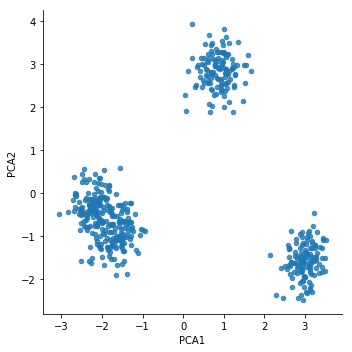

In [4]:
# next step is to do Principal Component Analysis using normalization data

x = StandardScaler().fit_transform(feature_data)

pca =  PCA(n_components= 2)

P_components = pca.fit_transform(x)

# save this P_Components data into new dataframe 
df_PCA = pd.DataFrame(P_components, columns= ['PCA1', 'PCA2'])

# now visualize this PCAComponents to see the cluster identification using scatter plot

sns.lmplot(x= 'PCA1', y= 'PCA2', data= df_PCA, fit_reg= False, scatter=True, scatter_kws={'s': 20})

plt.show()




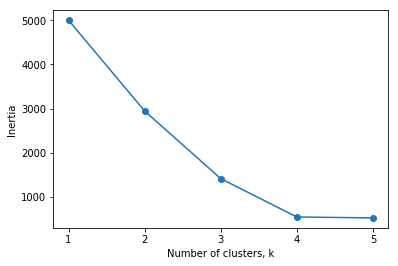

In [5]:
'''
From above plot, we can clearly see that there are three different kind of cluster. 
Lets check this above clustering using KMeans and see if we can see any different clustering number
but before that, we dont know how many different types of data this is, so we dont have yet knowledge how many n-clusters
in KMeans that we need to select. 

'''
# lets try to calculate the KMeans clustering values by using inertia of KMeans


'''
A good cluster has tight clusters ( low inertia ) but also doesnt 
contain too many clusters. We can choose the cluster a elbow point in a graph where inertia is decreasing more slowly.
'''
# Lets try to find our n_cluster in KMeans

num_Clusters = range(1, 6) 
val_inertia = []

for cluster in num_Clusters:
    m = KMeans(n_clusters= cluster)
    m.fit(x)
    val_inertia.append(m.inertia_)

plt.plot(num_Clusters, val_inertia, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(num_Clusters)
plt.show()
    
    
    
    
    
    

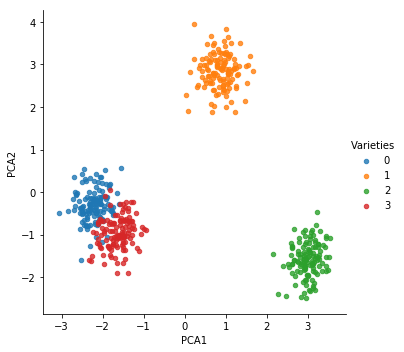

In [6]:
'''
From above graph, we can see that 4 is the lowest point from where the values
is decreasing very slowly. So, we can assume that 4 could be our good n_clusters 
value for our KMeans
'''

# lets use this 4 n_clusters and see how well the data are grouped together. 
kmeans = KMeans(n_clusters= 4)
fit_data = kmeans.fit(feature_data)
varieties = fit_data.predict(feature_data)

V_df = pd.DataFrame(varieties, columns= ['Varieties'])

cluster_df = pd.concat([df_PCA, V_df], axis= 1)

sns.lmplot(x= 'PCA1', y= 'PCA2', hue= 'Varieties', data= cluster_df, 
           fit_reg= False, scatter= True, scatter_kws= {'s': 20})

plt.show()
           
           
           

In [ ]:
'''
As that data are clustered properly, from this we can do next steps like finding the abnormalities in data and other stuffs. 
'''